## Model Building for Kaggle-Telstra-Network-Disruptions

I build three models for this Kaggle Competition. I first started with Random Forest, then with Gradient Boosting and finally with XG-Boost. I achieved the best score for XG-boost where i was ranked 159 out for 974 (top 16%)

## Importing library files for different models

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4

In [75]:

from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import pickle

## Loading the Feature  Engineered Train and Test Data 

In [3]:
train = pd.read_csv('data/train_data_final.csv') 
test = pd.read_csv('data/test_data_final.csv')

In [4]:
print train.shape
train.head()

(7381, 349)


,id,location,fault_severity,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,14121,118,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,9320,91,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,14394,152,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,8218,931,1.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,69,22
4,14804,120,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,19,12


In [61]:
train.fault_severity.value_counts()

0.0    4784
1.0    1871
2.0     726
Name: fault_severity, dtype: int64

In [5]:
print test.shape
test.head()

(11171, 348)


,id,location,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,11066,481,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,98
1,18000,962,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,131,29
2,16964,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,21
3,4795,532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,3
4,3392,600,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,136,8


## Seperating the Predictor variables and Labels

In [180]:
target = 'fault_severity'
IDcol = 'id'
train_predictors = [i for i in train.columns if i not in [target, IDcol]]
test_predictors = [i for i in test.columns if i not in [IDcol]]
print len(train_predictors)
print len(test_predictors)

347
347


In [7]:
X_train = train[train_predictors]
print X_train.shape
X_train.head()

(7381, 347)


,location,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,event_type 19,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,931,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,69,22
4,120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,12


In [8]:
train.fault_severity.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: fault_severity, dtype: float64

In [9]:
X_test = test[test_predictors]
print X_train.shape
X_train.head()

(7381, 347)


,location,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,event_type 19,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,931,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,69,22
4,120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,12


## Building Supervised Models

## 1. Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
# creating a function that fits model and predict, outputs model reports

def modelfit_RF(alg, dtrain, predictors,target,dtest,performCV=True,  cv_folds=5,  printTopN='all'):

        alg.fit(dtrain[predictors], dtrain[target])    
        if performCV:
            cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target],\
                                                        cv=cv_folds, scoring= 'accuracy')        
        # save the model to disk
        pickle.dump(alg, open('pickle/RF_model.sav', 'wb'))
        joblib.dump(alg, 'pickle/RF_model.pkl')   

        #Get train predictions:
        train_predictions = alg.predict(dtrain[predictors])
        train_pred_prob = alg.predict_proba(dtrain[predictors])
               
        print "\n Model Report"
        print "Confusion Matrix:"
        print pd.crosstab(dtrain[target], train_predictions)
        
        print "\n Accuracy Report" 
        print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, train_predictions)       
        
        if performCV:
            print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), \
                                                        np.std(cv_score),np.min(cv_score),np.max(cv_score))        
        #Print feature importance      
        feature_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        num_print = len(feature_imp)
        if printTopN != 'all':
            num_print = min(printTopN,len(feature_imp))
        feature_imp.iloc[:num_print-1].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show(block=False)
        
#         test_labels = list(alg.predict(dtest[predictors]))
#         return test_labels

Starting with initial parameters 


 Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             4520  151  113
1.0             1478  326   67
2.0              346   45  335

 Accuracy Report
Accuracy : 0.7019
CV Score : Mean - 0.6925945 | Std - 0.01016305 | Min - 0.6772666 | Max - 0.7016949


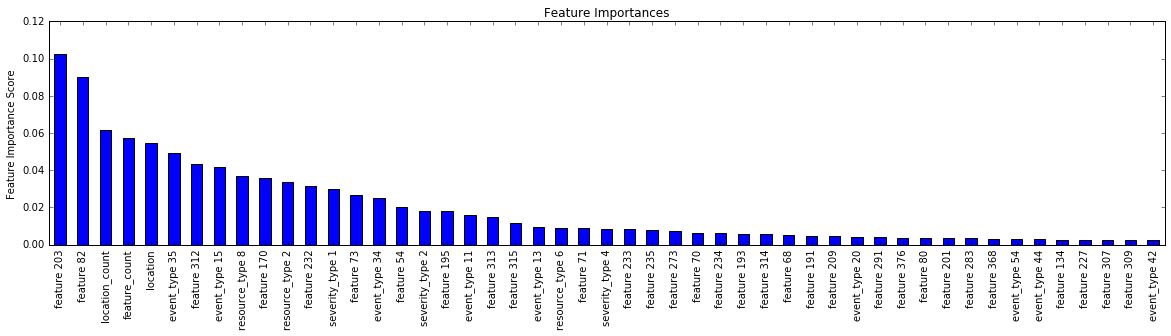

In [223]:
rf1 =  RandomForestClassifier(
                              n_estimators = 500,
                              criterion = 'gini',
                              max_leaf_nodes = 2**6,
                              min_samples_split=50,
                              min_samples_leaf=20,                                    
                              max_features='sqrt',
                              oob_score = True,
                              n_jobs = 4,                           
                              random_state=10)
modelfit_RF(rf1, train, train_predictors, target, test,   performCV=True, cv_folds=5, printTopN=50)



##  Tuning Random Forest Parameters using GridSearchCV and applying best parameters

In [225]:
param_test1 = { 'min_samples_split':range(10,150,30), 'max_leaf_nodes':[2**x for x in range(3,9)], }
gsearch1 = GridSearchCV(estimator = rf1, param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch1.fit(train[train_predictors],train[target]) 
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.64815, std: 0.00142, params: {'min_samples_split': 10, 'max_leaf_nodes': 8},
  mean: 0.64815, std: 0.00142, params: {'min_samples_split': 40, 'max_leaf_nodes': 8},
  mean: 0.64856, std: 0.00123, params: {'min_samples_split': 70, 'max_leaf_nodes': 8},
  mean: 0.64842, std: 0.00120, params: {'min_samples_split': 100, 'max_leaf_nodes': 8},
  mean: 0.64829, std: 0.00121, params: {'min_samples_split': 130, 'max_leaf_nodes': 8},
  mean: 0.68094, std: 0.00868, params: {'min_samples_split': 10, 'max_leaf_nodes': 16},
  mean: 0.68094, std: 0.00868, params: {'min_samples_split': 40, 'max_leaf_nodes': 16},
  mean: 0.68108, std: 0.00711, params: {'min_samples_split': 70, 'max_leaf_nodes': 16},
  mean: 0.68324, std: 0.00792, params: {'min_samples_split': 100, 'max_leaf_nodes': 16},
  mean: 0.68080, std: 0.01004, params: {'min_samples_split': 130, 'max_leaf_nodes': 16},
  mean: 0.69273, std: 0.01034, params: {'min_samples_split': 10, 'max_leaf_nodes': 32},
  mean: 0.69273, std: 0.01034, pa

In [227]:
rf2 =  RandomForestClassifier(
                              n_estimators = 500,
                              criterion = 'gini',
                              max_leaf_nodes = 32,   # best parameter
                              min_samples_split=130,  # best parameter
                              min_samples_leaf=20,                                    
                              max_features='sqrt',
                              oob_score = True,
                              n_jobs = 4,                           
                              random_state=10)  
    
param_test2 = { 'min_samples_leaf': range(30,150, 30),   'max_features':range(15,40,3) }
gsearch2 = GridSearchCV(estimator = rf2, param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch2.fit(train[train_predictors],train[target]) 
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.65520, std: 0.00259, params: {'max_features': 15, 'min_samples_leaf': 30},
  mean: 0.64815, std: 0.00034, params: {'max_features': 15, 'min_samples_leaf': 60},
  mean: 0.64815, std: 0.00034, params: {'max_features': 15, 'min_samples_leaf': 90},
  mean: 0.64815, std: 0.00034, params: {'max_features': 15, 'min_samples_leaf': 120},
  mean: 0.67674, std: 0.00685, params: {'max_features': 18, 'min_samples_leaf': 30},
  mean: 0.64937, std: 0.00179, params: {'max_features': 18, 'min_samples_leaf': 60},
  mean: 0.64815, std: 0.00034, params: {'max_features': 18, 'min_samples_leaf': 90},
  mean: 0.64815, std: 0.00034, params: {'max_features': 18, 'min_samples_leaf': 120},
  mean: 0.69639, std: 0.00714, params: {'max_features': 21, 'min_samples_leaf': 30},
  mean: 0.66211, std: 0.00457, params: {'max_features': 21, 'min_samples_leaf': 60},
  mean: 0.64869, std: 0.00057, params: {'max_features': 21, 'min_samples_leaf': 90},
  mean: 0.64815, std: 0.00034, params: {'max_features': 21, 'mi

In [229]:
rf3 =  RandomForestClassifier(
                              n_estimators = 500,
                              criterion = 'gini',
                              max_leaf_nodes = 32,   # best parameter
                              min_samples_split=130,  # best parameter
                              min_samples_leaf=30,    # best parameter                                
                              max_features=39,        # best parameter
                              oob_score = True,
                              n_jobs = 4,                           
                              random_state=10) 

param_test3 = { 'n_estimators': range(1000,3500, 500) }
gsearch3 = GridSearchCV(estimator = rf3, param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch3.fit(train[train_predictors],train[target]) 
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.73080, std: 0.00583, params: {'n_estimators': 1000},
  mean: 0.73107, std: 0.00586, params: {'n_estimators': 1500},
  mean: 0.73161, std: 0.00595, params: {'n_estimators': 2000},
  mean: 0.73121, std: 0.00594, params: {'n_estimators': 2500},
  mean: 0.73107, std: 0.00627, params: {'n_estimators': 3000}],
 {'n_estimators': 2000},
 0.73161162311423578)

##  Final Tuned Parameters used in Random Forest Model

In [230]:
rf4 =  RandomForestClassifier(
                              n_estimators = 2000,  # best parameter
                              criterion = 'gini',
                              max_leaf_nodes = 32,   # best parameter
                              min_samples_split=130,  # best parameter
                              min_samples_leaf=30,       # best parameter                                
                              max_features=39,          # best parameter
                              oob_score = True,
                              n_jobs = 4,                           
                              random_state=10) 

## Calling the Function that fits the model and predicts test label


 Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             4379  234  171
1.0             1166  585  120
2.0              193   68  465

 Accuracy Report
Accuracy : 0.7355
CV Score : Mean - 0.7316116 | Std - 0.005949965 | Min - 0.7205683 | Max - 0.7371274


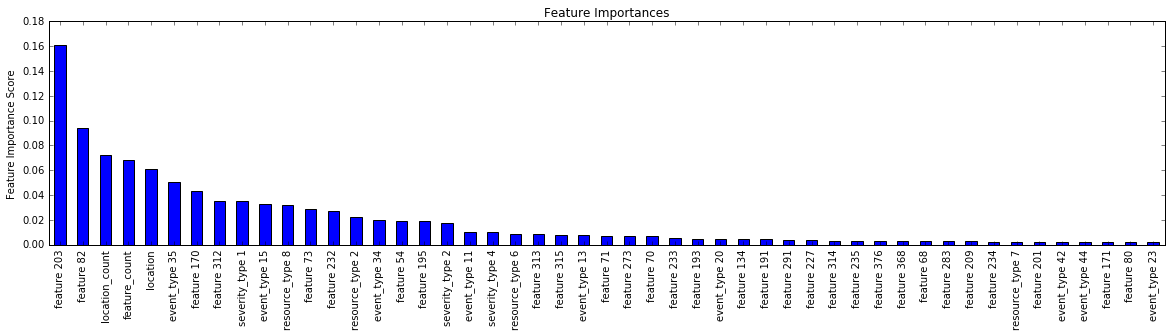

In [231]:
modelfit_RF(rf4, train, train_predictors, target, test,   performCV=True, cv_folds=5, printTopN=50)

## Predicted Results from Random Forest

In [232]:
test_labels_rf = list(rf4.predict_proba(test[test_predictors]))
test_labels_rf = pd.DataFrame(test_labels_rf)
test_labels_rf.rename(columns={0:'predict_0', 1:'predict_1', 2:'predict_2'}, inplace=True)
test_labels_rf.head()

,predict_0,predict_1,predict_2
0,0.919724,0.075538,0.004738
1,0.308569,0.219724,0.471706
2,0.934157,0.062739,0.003104
3,0.663724,0.314872,0.021404
4,0.349280,0.439765,0.210955


In [233]:
#merging the label with test data 
test_copy = test.copy()
test_copy = test_copy.iloc[:, [0]]
test_copy = test_copy.merge(test_labels_rf, left_index=True, right_index=True)
test_copy.to_csv("final_submission_rf4.csv" ,  index = False) # exporting to CSV
test_copy.head()

,id,predict_0,predict_1,predict_2
0,11066,0.919724,0.075538,0.004738
1,18000,0.308569,0.219724,0.471706
2,16964,0.934157,0.062739,0.003104
3,4795,0.663724,0.314872,0.021404
4,3392,0.349280,0.439765,0.210955


## Screenshot for the score recieved for Random Forest model

The score was not that good and I need to improve it.

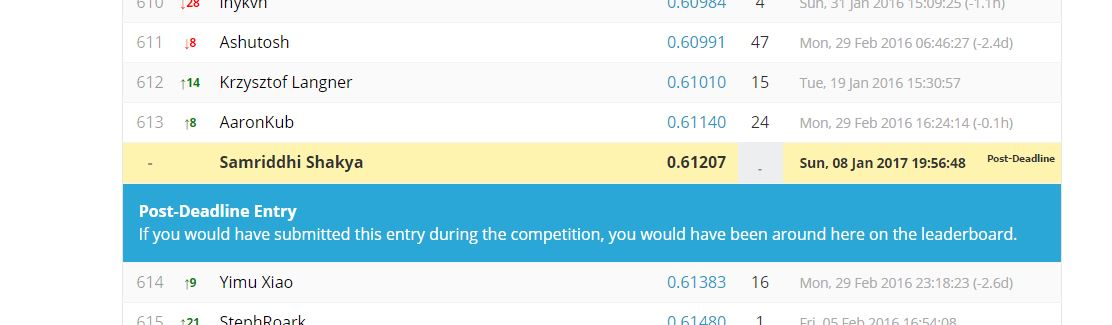

In [234]:
from IPython.display import Image
Image(filename='IMG_RF_submission.JPG') 

## 2. Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier #GBM algorithm

## Creating a Function that fits the model and predict the test label; Displays Model Report

In [193]:
def modelfit_Boosting(alg, dtrain, predictors,target,dtest,   
                     performCV=True,  cv_folds=5,  printTopN='all'):

        alg.fit(dtrain[predictors], dtrain[target])
    
        if performCV:
            cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target],\
                                                        cv=cv_folds, scoring= 'accuracy')        
        # save the model to disk
        pickle.dump(alg, open('pickle/Boosting_model.sav', 'wb'))
        joblib.dump(alg, 'pickle/Boosting_model.pkl')   

        #Get train predictions:
        train_predictions = alg.predict(dtrain[predictors])
        train_pred_prob = alg.predict_proba(dtrain[predictors])
               
        print "\n Model Report"
        print "Confusion Matrix:"
        print pd.crosstab(dtrain[target], train_predictions)
        
        print "\n Accuracy Report" 
        print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, train_predictions)       
        
        if performCV:
            print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), \
                                                        np.std(cv_score),np.min(cv_score),np.max(cv_score))        
        #Print feature importance      
        feature_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        num_print = len(feature_imp)
        if printTopN != 'all':
            num_print = min(printTopN,len(feature_imp))
        feature_imp.iloc[:num_print-1].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show(block=False)
        
#         test_labels = list(alg.predict(dtest[predictors]))
#         return test_labels

Initial Parameters for Gradient Boosting Model


 Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             4214  379  191
1.0              807  942  122
2.0              137   59  530

 Accuracy Report
Accuracy : 0.7704
CV Score : Mean - 0.7523375 | Std - 0.007315203 | Min - 0.7411924 | Max - 0.7615176


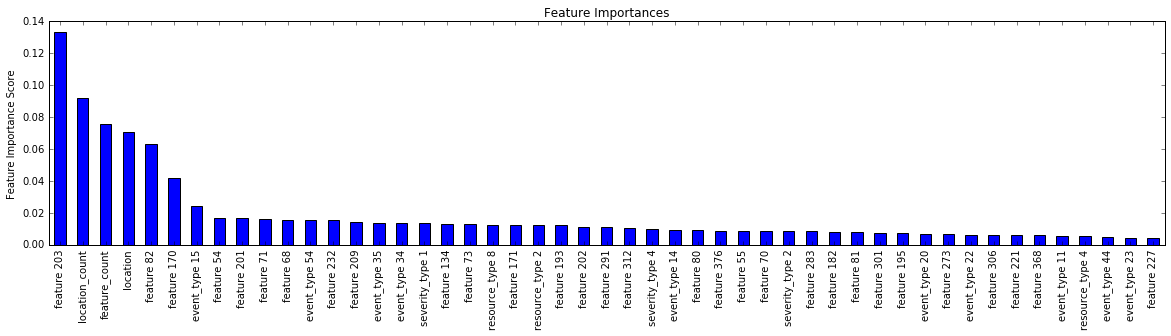

In [194]:
gbm1 =  GradientBoostingClassifier(
                                    learning_rate=0.1, 
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)

modelfit_Boosting(gbm1, train, train_predictors, target, test,   performCV=True, cv_folds=5, printTopN=50)


## Tuning the parameters for GBM using GridSearchCV and using the best parameters

In [173]:
# grid search on max depth and min child
param_test1 = { 'n_estimators':range(20,100,10) }
gsearch1 = GridSearchCV(estimator = gbm1, param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch1.fit(train[train_predictors],train[target]) 
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.71549, std: 0.00681, params: {'n_estimators': 20},
  mean: 0.72877, std: 0.00658, params: {'n_estimators': 30},
  mean: 0.73256, std: 0.00737, params: {'n_estimators': 40},
  mean: 0.73825, std: 0.00569, params: {'n_estimators': 50},
  mean: 0.74082, std: 0.00653, params: {'n_estimators': 60},
  mean: 0.74746, std: 0.00575, params: {'n_estimators': 70},
  mean: 0.74868, std: 0.00846, params: {'n_estimators': 80},
  mean: 0.75085, std: 0.00814, params: {'n_estimators': 90}],
 {'n_estimators': 90},
 0.75084777896929222)

In [174]:
gbm2 =  GradientBoostingClassifier(
                                    learning_rate=0.1, 
                                    n_estimators=90,         # best parameter
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)
param_test2 = { 'max_depth':range(5,20,2), 'min_samples_split':range(200,1001,200) }
gsearch2 = GridSearchCV(estimator = gbm2, param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch2.fit(train[train_predictors],train[target]) 
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.74177, std: 0.00581, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.74136, std: 0.00568, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.74096, std: 0.00702, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.74069, std: 0.00617, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.73947, std: 0.00565, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.75058, std: 0.00670, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.74990, std: 0.00679, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.74651, std: 0.00608, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.74543, std: 0.00584, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.74584, std: 0.00411, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.74990, std: 0.00564, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.74963, std: 0.00694, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [175]:
gbm3 =  GradientBoostingClassifier(
                                    learning_rate=0.1, 
                                    n_estimators=90,         # best parameter
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=13,            # best parameter
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)
param_test3 = { 'min_samples_split':range(50,500,50), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = gbm3, param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch3.fit(train[train_predictors],train[target]) 
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.75654, std: 0.00492, params: {'min_samples_split': 50, 'min_samples_leaf': 30},
  mean: 0.75830, std: 0.00484, params: {'min_samples_split': 100, 'min_samples_leaf': 30},
  mean: 0.75654, std: 0.00593, params: {'min_samples_split': 150, 'min_samples_leaf': 30},
  mean: 0.75573, std: 0.00665, params: {'min_samples_split': 200, 'min_samples_leaf': 30},
  mean: 0.75491, std: 0.00772, params: {'min_samples_split': 250, 'min_samples_leaf': 30},
  mean: 0.75315, std: 0.00456, params: {'min_samples_split': 300, 'min_samples_leaf': 30},
  mean: 0.75518, std: 0.00610, params: {'min_samples_split': 350, 'min_samples_leaf': 30},
  mean: 0.75532, std: 0.00698, params: {'min_samples_split': 400, 'min_samples_leaf': 30},
  mean: 0.75410, std: 0.00593, params: {'min_samples_split': 450, 'min_samples_leaf': 30},
  mean: 0.75681, std: 0.00438, params: {'min_samples_split': 50, 'min_samples_leaf': 40},
  mean: 0.75559, std: 0.00611, params: {'min_samples_split': 100, 'min_samples_leaf': 40},
 

In [176]:
gbm4 =  GradientBoostingClassifier(
                                    learning_rate=0.1, 
                                    n_estimators=90,         # best parameter
                                    min_samples_split=100,    # best parameter
                                    min_samples_leaf=50,
                                    max_depth=13,            # best parameter
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)
param_test4 = { 'min_samples_leaf':range(10,50,5), 'max_features':range(7,25,2)}
gsearch4 = GridSearchCV(estimator = gbm4, param_grid = param_test4, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch4.fit(train[train_predictors],train[target]) 
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.75071, std: 0.00276, params: {'max_features': 7, 'min_samples_leaf': 10},
  mean: 0.74380, std: 0.00796, params: {'max_features': 7, 'min_samples_leaf': 15},
  mean: 0.74069, std: 0.00904, params: {'max_features': 7, 'min_samples_leaf': 20},
  mean: 0.73730, std: 0.00849, params: {'max_features': 7, 'min_samples_leaf': 25},
  mean: 0.73080, std: 0.00740, params: {'max_features': 7, 'min_samples_leaf': 30},
  mean: 0.72863, std: 0.00577, params: {'max_features': 7, 'min_samples_leaf': 35},
  mean: 0.72457, std: 0.00775, params: {'max_features': 7, 'min_samples_leaf': 40},
  mean: 0.71752, std: 0.01034, params: {'max_features': 7, 'min_samples_leaf': 45},
  mean: 0.75451, std: 0.00687, params: {'max_features': 9, 'min_samples_leaf': 10},
  mean: 0.75424, std: 0.00404, params: {'max_features': 9, 'min_samples_leaf': 15},
  mean: 0.74800, std: 0.00616, params: {'max_features': 9, 'min_samples_leaf': 20},
  mean: 0.74272, std: 0.00571, params: {'max_features': 9, 'min_samples_leaf

In [179]:
gbm5 =  GradientBoostingClassifier(
                                    learning_rate=0.1, 
                                    n_estimators=90,         # best parameter
                                    min_samples_split=100,    # best parameter
                                    min_samples_leaf=15,      #best parameter
                                    max_depth=13,            # best parameter
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)
param_test5 = { 'max_features':range(18,35,2), 'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95]}
gsearch5 = GridSearchCV(estimator = gbm5, param_grid = param_test5, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch5.fit(train[train_predictors],train[target]) 
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.76033, std: 0.00440, params: {'max_features': 18, 'subsample': 0.6},
  mean: 0.76006, std: 0.00567, params: {'max_features': 18, 'subsample': 0.7},
  mean: 0.76277, std: 0.00583, params: {'max_features': 18, 'subsample': 0.75},
  mean: 0.76264, std: 0.00400, params: {'max_features': 18, 'subsample': 0.8},
  mean: 0.76358, std: 0.00473, params: {'max_features': 18, 'subsample': 0.85},
  mean: 0.76453, std: 0.00391, params: {'max_features': 18, 'subsample': 0.9},
  mean: 0.76575, std: 0.00629, params: {'max_features': 18, 'subsample': 0.95},
  mean: 0.76115, std: 0.00953, params: {'max_features': 20, 'subsample': 0.6},
  mean: 0.76304, std: 0.00499, params: {'max_features': 20, 'subsample': 0.7},
  mean: 0.76169, std: 0.00588, params: {'max_features': 20, 'subsample': 0.75},
  mean: 0.76155, std: 0.00546, params: {'max_features': 20, 'subsample': 0.8},
  mean: 0.76142, std: 0.00564, params: {'max_features': 20, 'subsample': 0.85},
  mean: 0.76237, std: 0.00554, params: {'max_fe

In [197]:
# learning_rate=0.05 ,   n_estimators=1500
gbm6 =  GradientBoostingClassifier(
                                    learning_rate=0.05, 
                                    n_estimators=90,         # best parameter
                                    min_samples_split=100,    # best parameter
                                    min_samples_leaf=15,      #best parameter
                                    max_depth=13,            # best parameter
                                    max_features=32,           # best parameter
                                    subsample=0.95,            # best parameter
                                    random_state=10)

param_test6 = { 'n_estimators':range(1000,3500,500),'learning_rate' : [0.01,0.05,0.005]}
gsearch6 = GridSearchCV(estimator = gbm6, param_grid = param_test6, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch6.fit(train[train_predictors],train[target]) 
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.76575, std: 0.00209, params: {'n_estimators': 1000, 'learning_rate': 0.01},
  mean: 0.76656, std: 0.00352, params: {'n_estimators': 1500, 'learning_rate': 0.01},
  mean: 0.76738, std: 0.00559, params: {'n_estimators': 2000, 'learning_rate': 0.01},
  mean: 0.76602, std: 0.00570, params: {'n_estimators': 2500, 'learning_rate': 0.01},
  mean: 0.76630, std: 0.00676, params: {'n_estimators': 3000, 'learning_rate': 0.01},
  mean: 0.76467, std: 0.00504, params: {'n_estimators': 1000, 'learning_rate': 0.05},
  mean: 0.76237, std: 0.00607, params: {'n_estimators': 1500, 'learning_rate': 0.05},
  mean: 0.76440, std: 0.00617, params: {'n_estimators': 2000, 'learning_rate': 0.05},
  mean: 0.76359, std: 0.00813, params: {'n_estimators': 2500, 'learning_rate': 0.05},
  mean: 0.76155, std: 0.00961, params: {'n_estimators': 3000, 'learning_rate': 0.05},
  mean: 0.76399, std: 0.00564, params: {'n_estimators': 1000, 'learning_rate': 0.005},
  mean: 0.76534, std: 0.00419, params: {'n_estimators

## Fitting the GBM model with final parameters after tuning


 Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4333   325  126
1.0              485  1301   85
2.0               65    50  611

 Accuracy Report
Accuracy : 0.8461
CV Score : Mean - 0.7683249 | Std - 0.002528196 | Min - 0.7642276 | Max - 0.7708475


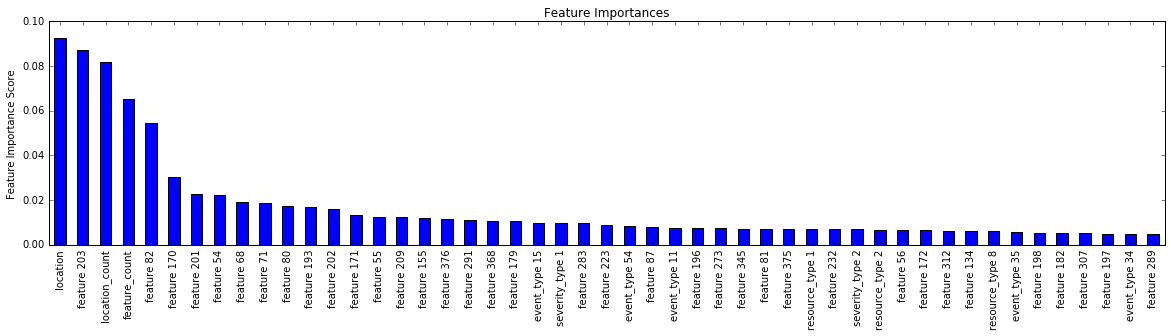

In [198]:
gbm7 =  GradientBoostingClassifier(
                                    learning_rate=0.005,        # best parameter
                                    n_estimators=2500,         # best parameter
                                    min_samples_split=100,    # best parameter
                                    min_samples_leaf=15,      #best parameter
                                    max_depth=13,            # best parameter
                                    max_features=32,           # best parameter
                                    subsample=0.95,            # best parameter
                                    random_state=10)
modelfit_Boosting(gbm7, train, train_predictors, target, test,   performCV=True, cv_folds=5, printTopN=50)

## Predicted Output from the GBM model

In [202]:
test_labels_gbm = list(gbm7.predict_proba(test[test_predictors]))
test_labels_gbm = pd.DataFrame(test_labels_gbm)
test_labels_gbm.rename(columns={0:'predict_0', 1:'predict_1', 2:'predict_2'}, inplace=True)
test_labels_gbm.head()

,predict_0,predict_1,predict_2
0,0.983694,0.015084,0.001222
1,0.295123,0.062921,0.641956
2,0.988137,0.010818,0.001045
3,0.733429,0.232333,0.034238
4,0.284322,0.684861,0.030817


In [205]:
#merging the label with test data from XGB
test_copy = test.copy()
test_copy = test_copy.iloc[:, [0]]
test_copy = test_copy.merge(test_labels_gbm, left_index=True, right_index=True)
test_copy.to_csv("final_submission_GBM7.csv" ,  index = False)
test_copy.head()

,id,predict_0,predict_1,predict_2
0,11066,0.983694,0.015084,0.001222
1,18000,0.295123,0.062921,0.641956
2,16964,0.988137,0.010818,0.001045
3,4795,0.733429,0.232333,0.034238
4,3392,0.284322,0.684861,0.030817


## Screen shot of GBM model score

Moved up in the ranks.  Good Progress. Jumped from 613 to 195     :)

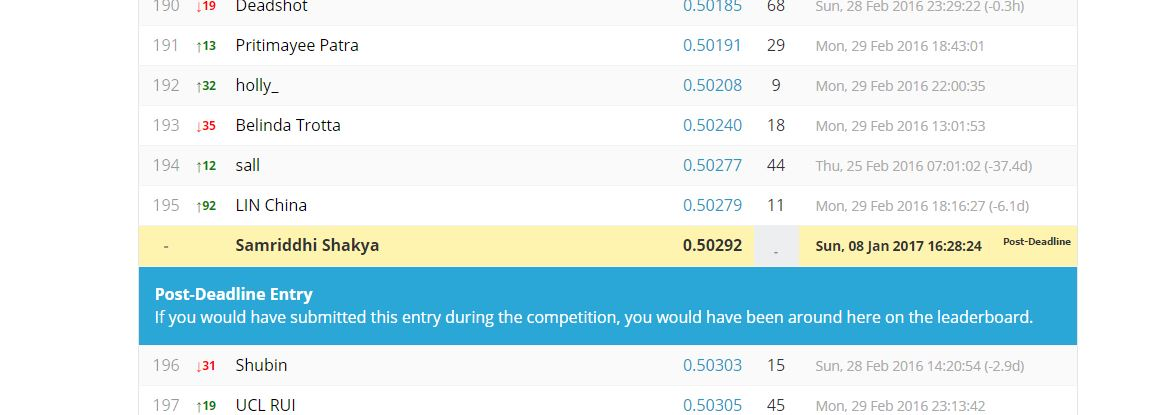

In [208]:
from IPython.display import Image
Image(filename='IMG_GBM_submission.JPG') 

## 3. XG-Boost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [318]:
import xgboost as xgb

def modelfit_xgb(alg, dtrain, predictors,target,dtest, eval_metric, num_class, scoring_metric_xgb,\
             performCV=True, useTrainCV=False, cv_folds=5, early_stopping_rounds=20, printTopN='all'):

        if useTrainCV:
            xgb_param = alg.get_xgb_params()
            xgtrain = xgb.DMatrix( dtrain[predictors].values, label=dtrain[target].values)
            if num_class>2:
                
                xgb_param['num_class']=num_class
            cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round= alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics= scoring_metric_xgb, early_stopping_rounds=early_stopping_rounds)
            alg.set_params(n_estimators=cvresult.shape[0])

        print alg.get_params()
        alg.fit(dtrain[predictors], dtrain[target], eval_metric=eval_metric)
        
        # save the model to disk
        pickle.dump(alg, open('pickle/XGB5_model.sav', 'wb'))
        joblib.dump(alg, 'pickle/XGB5_model.pkl')  

        #Get train predictions:
        train_predictions = alg.predict(dtrain[predictors])
        train_pred_prob = alg.predict_proba(dtrain[predictors])
               
        print "\n Model Report"
        print "Confusion Matrix:"
        print pd.crosstab(dtrain[target], train_predictions)
        
        print "\n Accuracy Report" 
        print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, train_predictions)
        print "Train Log Loss : %f" % metrics.log_loss(dtrain[target].values,train_pred_prob) 
        
        #Print feature importance        
        feature_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        num_print = len(feature_imp)
        if printTopN != 'all':
            num_print = min(printTopN,len(feature_imp))
        feature_imp.iloc[:num_print-1].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show(block=False)
        
        test_labels = list(alg.predict_proba(dtest[predictors]))
        return test_labels
        

Initial Parameter Values

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 150, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 27, 'min_child_weight': 1, 'objective': 'multi:softmax', 'max_depth': 5, 'gamma': 0}

 Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4347   291  146
1.0              557  1219   95
2.0               62    44  620

 Accuracy Report
Accuracy : 0.8381
Train Log Loss : 0.401468


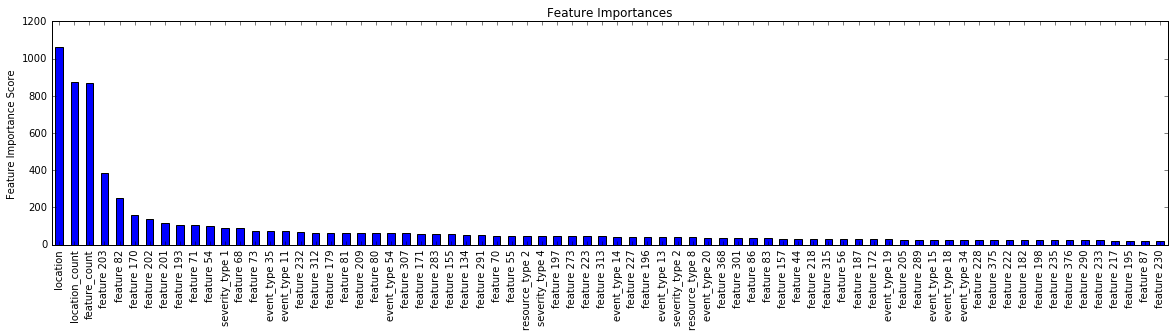

[array([  9.85756099e-01,   1.36296637e-02,   6.14246004e-04], dtype=float32),
 array([ 0.32406038,  0.09311366,  0.58282596], dtype=float32),
 array([  9.87819552e-01,   1.18111335e-02,   3.69292829e-04], dtype=float32),
 array([ 0.82998025,  0.15906945,  0.01095026], dtype=float32),
 array([ 0.30325916,  0.66187972,  0.03486116], dtype=float32),
 array([ 0.51330149,  0.4747369 ,  0.0119616 ], dtype=float32),
 array([  8.60093296e-01,   1.39285594e-01,   6.21079642e-04], dtype=float32),
 array([ 0.13342297,  0.08555552,  0.78102148], dtype=float32),
 array([ 0.93791711,  0.05408364,  0.00799921], dtype=float32),
 array([ 0.8604787 ,  0.13661593,  0.00290541], dtype=float32),
 array([  8.44763398e-01,   1.54495597e-01,   7.40994059e-04], dtype=float32),
 array([ 0.45850393,  0.54068863,  0.00080748], dtype=float32),
 array([ 0.86850584,  0.12453625,  0.00695786], dtype=float32),
 array([ 0.27936834,  0.07534513,  0.6452865 ], dtype=float32),
 array([ 0.81324601,  0.16808741,  0.0186666

In [319]:
# starting with common values
xgb1 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=150,
             max_depth=5,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'multi:softmax',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
modelfit_xgb(xgb1, train, train_predictors,target,test, eval_metric=['mlogloss'],num_class =3, \
         scoring_metric_xgb= 'mlogloss', performCV=False, useTrainCV=True, printTopN = 75)

## Tuning Parameters for XG-Boost using GridSearchCV

In [23]:
# grid search on max depth and min child
param_test1 = { 'max_depth':range(5,12,2), 'min_child_weight':range(1,8,2) }
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch1.fit(train[train_predictors],train[target]) 
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76941, std: 0.00452, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.76589, std: 0.00649, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.76738, std: 0.00706, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.76331, std: 0.00591, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.77036, std: 0.00502, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.76792, std: 0.00402, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.77049, std: 0.00732, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.76751, std: 0.00720, params: {'max_depth': 7, 'min_child_weight': 7},
  mean: 0.77199, std: 0.00997, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.77131, std: 0.00773, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.76860, std: 0.00400, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.76724, std: 0.00856, params: {'max_depth': 9, 'min_child_weight': 7},
  mean: 0.77050, std: 0.00964, params: {

In [25]:
param_test1 = { 'max_depth':[7,8,9,10,11], 'min_child_weight':[1,2,3] }
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch1.fit(train[train_predictors],train[target]) 
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77036, std: 0.00502, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.76778, std: 0.00510, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.76792, std: 0.00402, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.76982, std: 0.00957, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.76968, std: 0.00804, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: 0.76535, std: 0.00702, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.77199, std: 0.00997, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.76914, std: 0.00892, params: {'max_depth': 9, 'min_child_weight': 2},
  mean: 0.77131, std: 0.00773, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.77063, std: 0.00807, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: 0.76833, std: 0.01013, params: {'max_depth': 10, 'min_child_weight': 2},
  mean: 0.76982, std: 0.00840, params: {'max_depth': 10, 'min_child_weight': 3},
  mean: 0.77050, std: 0.00964, params

In [306]:
xgb2 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=150,
             max_depth=9,   #best parameter
             min_child_weight=1,  #best parameter
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'multi:softmax',
             nthread=4,
             scale_pos_weight=1,
             seed=27)

In [34]:
param_test2 = { 'gamma':[i/10.0 for i in range(0,7,2)] }
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch2.fit(train[train_predictors],train[target]) 
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.77199, std: 0.00997, params: {'gamma': 0.0},
  mean: 0.77266, std: 0.01111, params: {'gamma': 0.2},
  mean: 0.76982, std: 0.01064, params: {'gamma': 0.4},
  mean: 0.76941, std: 0.00817, params: {'gamma': 0.6}],
 {'gamma': 0.2},
 0.77266478697033936)

In [35]:
param_test2 = { 'gamma':[0.1,0.2,0.3,0.4] }
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch2.fit(train[train_predictors],train[target]) 
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.77050, std: 0.00949, params: {'gamma': 0.1},
  mean: 0.77266, std: 0.01111, params: {'gamma': 0.2},
  mean: 0.76901, std: 0.01118, params: {'gamma': 0.3},
  mean: 0.76982, std: 0.01064, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.77266478697033936)

In [307]:
xgb3 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=150,
             max_depth=9,              #best parameter
             min_child_weight=1,       #best parameter
             gamma=0.2,                #best parameter
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'multi:softmax',
             nthread=4,
             scale_pos_weight=1,
             seed=27)

In [37]:
param_test3 = {  'subsample':[i/10.0 for i in range(3,10)],
                 'colsample_bytree':[i/10.0 for i in range(3,10)] }
gsearch3 = GridSearchCV(estimator = xgb3, param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch3.fit(train[train_predictors],train[target]) 
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76629, std: 0.00837, params: {'subsample': 0.3, 'colsample_bytree': 0.3},
  mean: 0.76603, std: 0.00749, params: {'subsample': 0.4, 'colsample_bytree': 0.3},
  mean: 0.76996, std: 0.01139, params: {'subsample': 0.5, 'colsample_bytree': 0.3},
  mean: 0.77050, std: 0.01101, params: {'subsample': 0.6, 'colsample_bytree': 0.3},
  mean: 0.77117, std: 0.00921, params: {'subsample': 0.7, 'colsample_bytree': 0.3},
  mean: 0.77239, std: 0.00832, params: {'subsample': 0.8, 'colsample_bytree': 0.3},
  mean: 0.77294, std: 0.00930, params: {'subsample': 0.9, 'colsample_bytree': 0.3},
  mean: 0.76752, std: 0.01065, params: {'subsample': 0.3, 'colsample_bytree': 0.4},
  mean: 0.76874, std: 0.00954, params: {'subsample': 0.4, 'colsample_bytree': 0.4},
  mean: 0.77090, std: 0.00877, params: {'subsample': 0.5, 'colsample_bytree': 0.4},
  mean: 0.77063, std: 0.00875, params: {'subsample': 0.6, 'colsample_bytree': 0.4},
  mean: 0.77294, std: 0.01043, params: {'subsample': 0.7, 'colsample_bytree'

In [308]:
xgb4 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=150,
             max_depth=9,              #best parameter
             min_child_weight=1,       #best parameter
             gamma=0.2,                #best parameter
             subsample=0.9,            #best parameter
             colsample_bytree=0.6,     #best parameter
             objective= 'multi:softmax',
             nthread=4,
             scale_pos_weight=1,
             seed=27)

In [41]:
param_test4 = { 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] }
gsearch4 = GridSearchCV(estimator = xgb4, param_grid = param_test4, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch4.fit(train[train_predictors],train[target]) 
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.77537, std: 0.00921, params: {'reg_alpha': 0},
  mean: 0.77551, std: 0.00943, params: {'reg_alpha': 0.001},
  mean: 0.77429, std: 0.00990, params: {'reg_alpha': 0.005},
  mean: 0.77510, std: 0.00880, params: {'reg_alpha': 0.01},
  mean: 0.77497, std: 0.00890, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.001},
 0.77550875669853914)

In [320]:
xgb5 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=150,
             max_depth=9,              #best parameter
             min_child_weight=1,       #best parameter
             gamma=0.2,                #best parameter
             subsample=0.9,            #best parameter
             colsample_bytree=0.6,     #best parameter
             objective= 'multi:softmax',
             nthread=4,
             reg_alpha= 0.001,
             scale_pos_weight=1,
             seed=27)

In [321]:
param_test5 = {  'n_estimators':range(1000,3500,500),'learning_rate' : [0.01,0.05,0.005]  }
gsearch5 = GridSearchCV(estimator = xgb5, param_grid = param_test5, scoring='accuracy', n_jobs=4, iid=False, cv=5) 
gsearch5.fit(train[train_predictors],train[target]) 
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_  

([mean: 0.77375, std: 0.01132, params: {'n_estimators': 1000, 'learning_rate': 0.01},
  mean: 0.77470, std: 0.00993, params: {'n_estimators': 1500, 'learning_rate': 0.01},
  mean: 0.77510, std: 0.00943, params: {'n_estimators': 2000, 'learning_rate': 0.01},
  mean: 0.77605, std: 0.00977, params: {'n_estimators': 2500, 'learning_rate': 0.01},
  mean: 0.77456, std: 0.01061, params: {'n_estimators': 3000, 'learning_rate': 0.01},
  mean: 0.77402, std: 0.00919, params: {'n_estimators': 1000, 'learning_rate': 0.05},
  mean: 0.77172, std: 0.00844, params: {'n_estimators': 1500, 'learning_rate': 0.05},
  mean: 0.77063, std: 0.00760, params: {'n_estimators': 2000, 'learning_rate': 0.05},
  mean: 0.76928, std: 0.00848, params: {'n_estimators': 2500, 'learning_rate': 0.05},
  mean: 0.76806, std: 0.00850, params: {'n_estimators': 3000, 'learning_rate': 0.05},
  mean: 0.77022, std: 0.00493, params: {'n_estimators': 1000, 'learning_rate': 0.005},
  mean: 0.77361, std: 0.00936, params: {'n_estimators

## Fitting the Model with final parameters and Predicting the Test labels

In [323]:
# final parameters
xgb6 = XGBClassifier(
             learning_rate =0.01,     #best parameter
             n_estimators=2500,       #best parameter
             max_depth=9,              #best parameter
             min_child_weight=1,       #best parameter
             gamma=0.2,                #best parameter
             subsample=0.9,            #best parameter
             colsample_bytree=0.6,     #best parameter
             objective= 'multi:softmax',
             nthread=4,
             reg_alpha= 0.001,            
             scale_pos_weight=1,
             max_delta_step = 1 ,  # for imbalanced classification problems
             seed=27)


{'reg_alpha': 0.001, 'colsample_bytree': 0.6, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': None, 'max_delta_step': 1, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 1113, 'subsample': 0.9, 'reg_lambda': 1, 'seed': 27, 'min_child_weight': 1, 'objective': 'multi:softmax', 'max_depth': 9, 'gamma': 0.2}

 Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4550   191   43
1.0              324  1513   34
2.0               39    22  665

 Accuracy Report
Accuracy : 0.9115
Train Log Loss : 0.292314


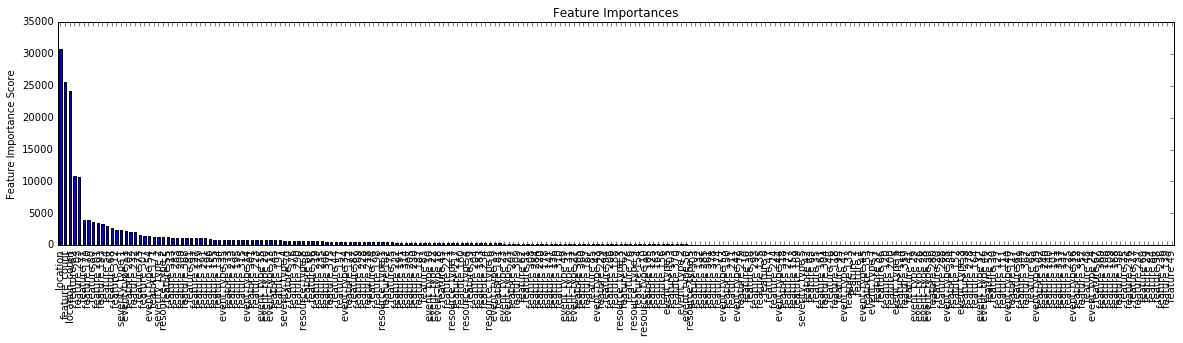

In [324]:
testlabel_xgb = modelfit_xgb(xgb6, train, train_predictors,target,test, eval_metric=['mlogloss'],num_class =3, \
         scoring_metric_xgb= 'mlogloss', performCV=False, useTrainCV=True)

## Prediction results from XG-Boost

Hoping for the better score.  Fingers crossed

In [330]:
test_labels_XGB = pd.DataFrame(testlabel_xgb)
test_labels_XGB.rename(columns={0:'predict_0', 1:'predict_1', 2:'predict_2'}, inplace=True)
test_labels_XGB.head()

,predict_0,predict_1,predict_2
0,0.987708,0.011438,0.000854
1,0.244837,0.081680,0.673483
2,0.993796,0.005733,0.000471
3,0.888151,0.101399,0.010450
4,0.410337,0.565209,0.024454


In [331]:
#merging the label with test data from XGB
test_copy = test.copy()
test_copy = test_copy.iloc[:, [0]]
test_copy = test_copy.merge(test_labels_XGB, left_index=True, right_index=True)
test_copy.to_csv("final_submission_XGB5.csv" ,  index = False)
test_copy.head()

,id,predict_0,predict_1,predict_2
0,11066,0.987708,0.011438,0.000854
1,18000,0.244837,0.081680,0.673483
2,16964,0.993796,0.005733,0.000471
3,4795,0.888151,0.101399,0.010450
4,3392,0.410337,0.565209,0.024454


## Screen shot for XG-Boost Score

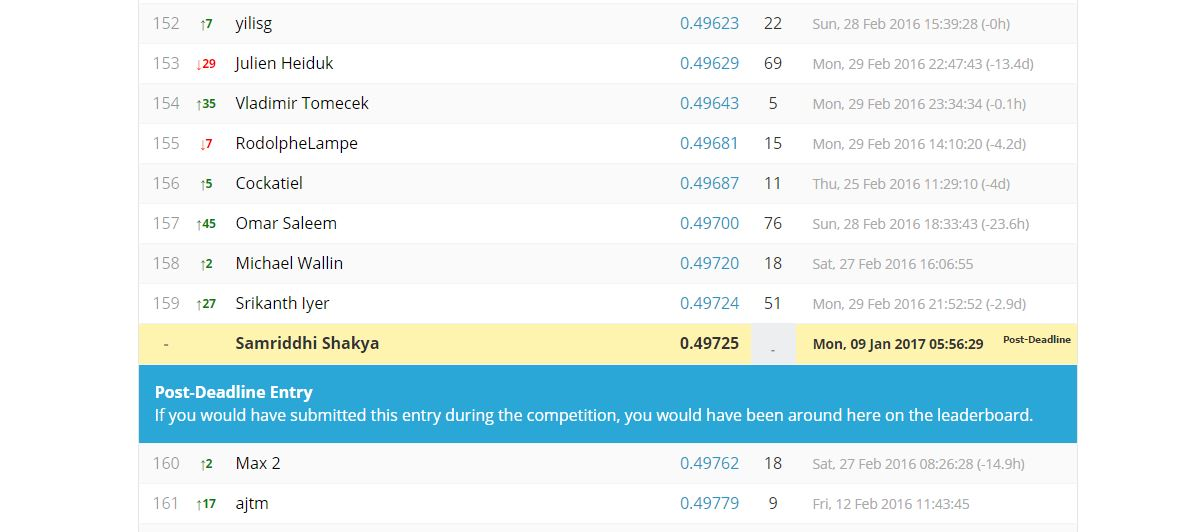

In [332]:
from IPython.display import Image
Image(filename='IMG_XGB_submission.JPG') 

## Conclusion

XG-boost outperformed than other models in this competition. It is the ultimate weapon for data scientists. It is highly sophisticated algorithm, powerful enough to deal with all sorts of irregularities of data.It is similar to gradient boosting framework but more efficient. It has both linear model solver and tree learning algorithms and has capacity to do parallel computation on a single machine. It has high  predictive power therefore “XG-boost” becomes an ideal fit for Kaggle competitions. It also has additional features for doing cross validation and finding important variables. 

If you want good score, then u must have XG-BOOST


Submitted by Samriddhi Shakya